In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

# Part 1: Temporal Patterns

In [2]:
crime_data=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

## Weekly patterns

In [4]:
# prepar such that we get lables on plot in weekly order.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(days,range(len(days))))
crime_data['Day_id'] = crime_data['DayOfWeek'].map(sorterIndex)

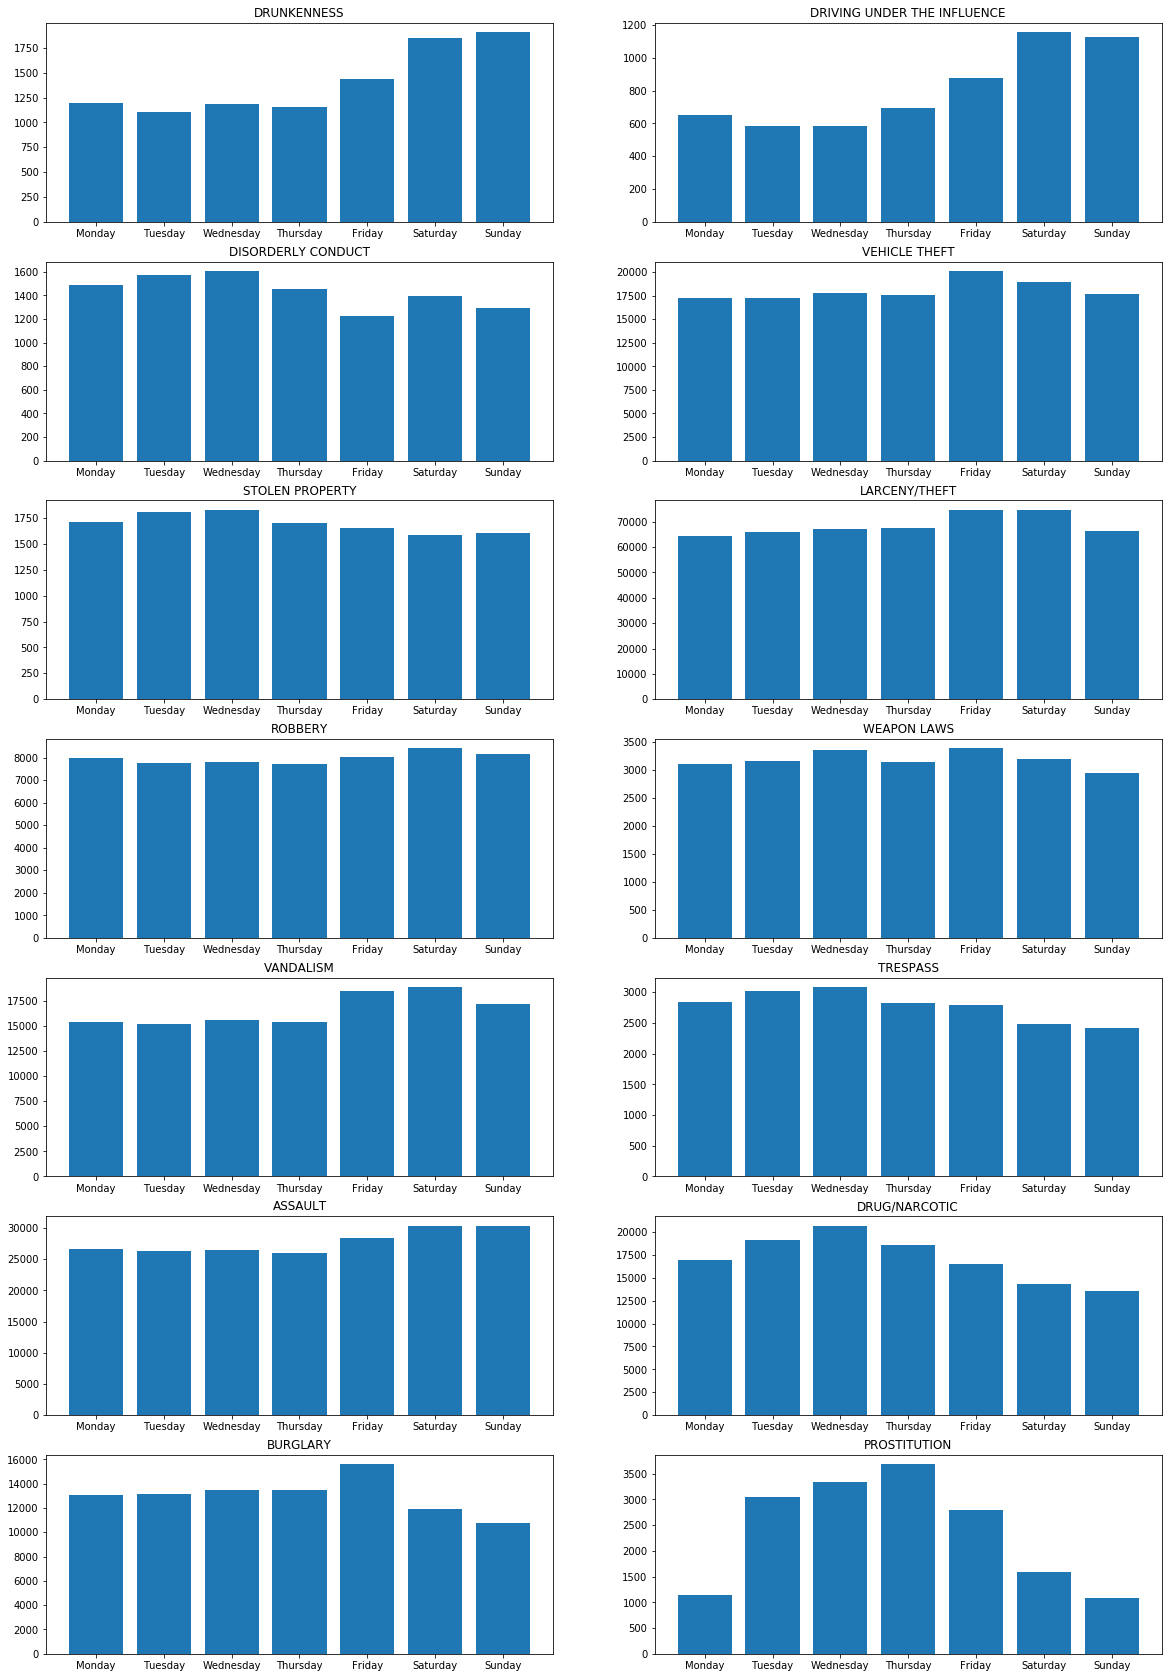

In [5]:
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(days)), xticklabels=days)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=crime_data[crime_data.Category==crime].Day_id.value_counts().sort_index()
    axs[i].bar(focus_crime_count.index.tolist(), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1
plt.show()

Based on the above plots a few supprising observations can be made. For instance disorderly conduct peaks at tuesday and weedensday. Also stolen property and trespass follows a similar pattern. Even more pronounced is the tendency shown for prostitution, where there is a clear peak on thursdays, and with a noticablly high number of reports from Tuesday to Friday. When focusing on Drugs it is supprising to notice that the peak in number of reports occure on Wednesday, and that the lowest number of reports are made on Friday, Saturday and Sunday in that respectivly order.

## Yearly patterns

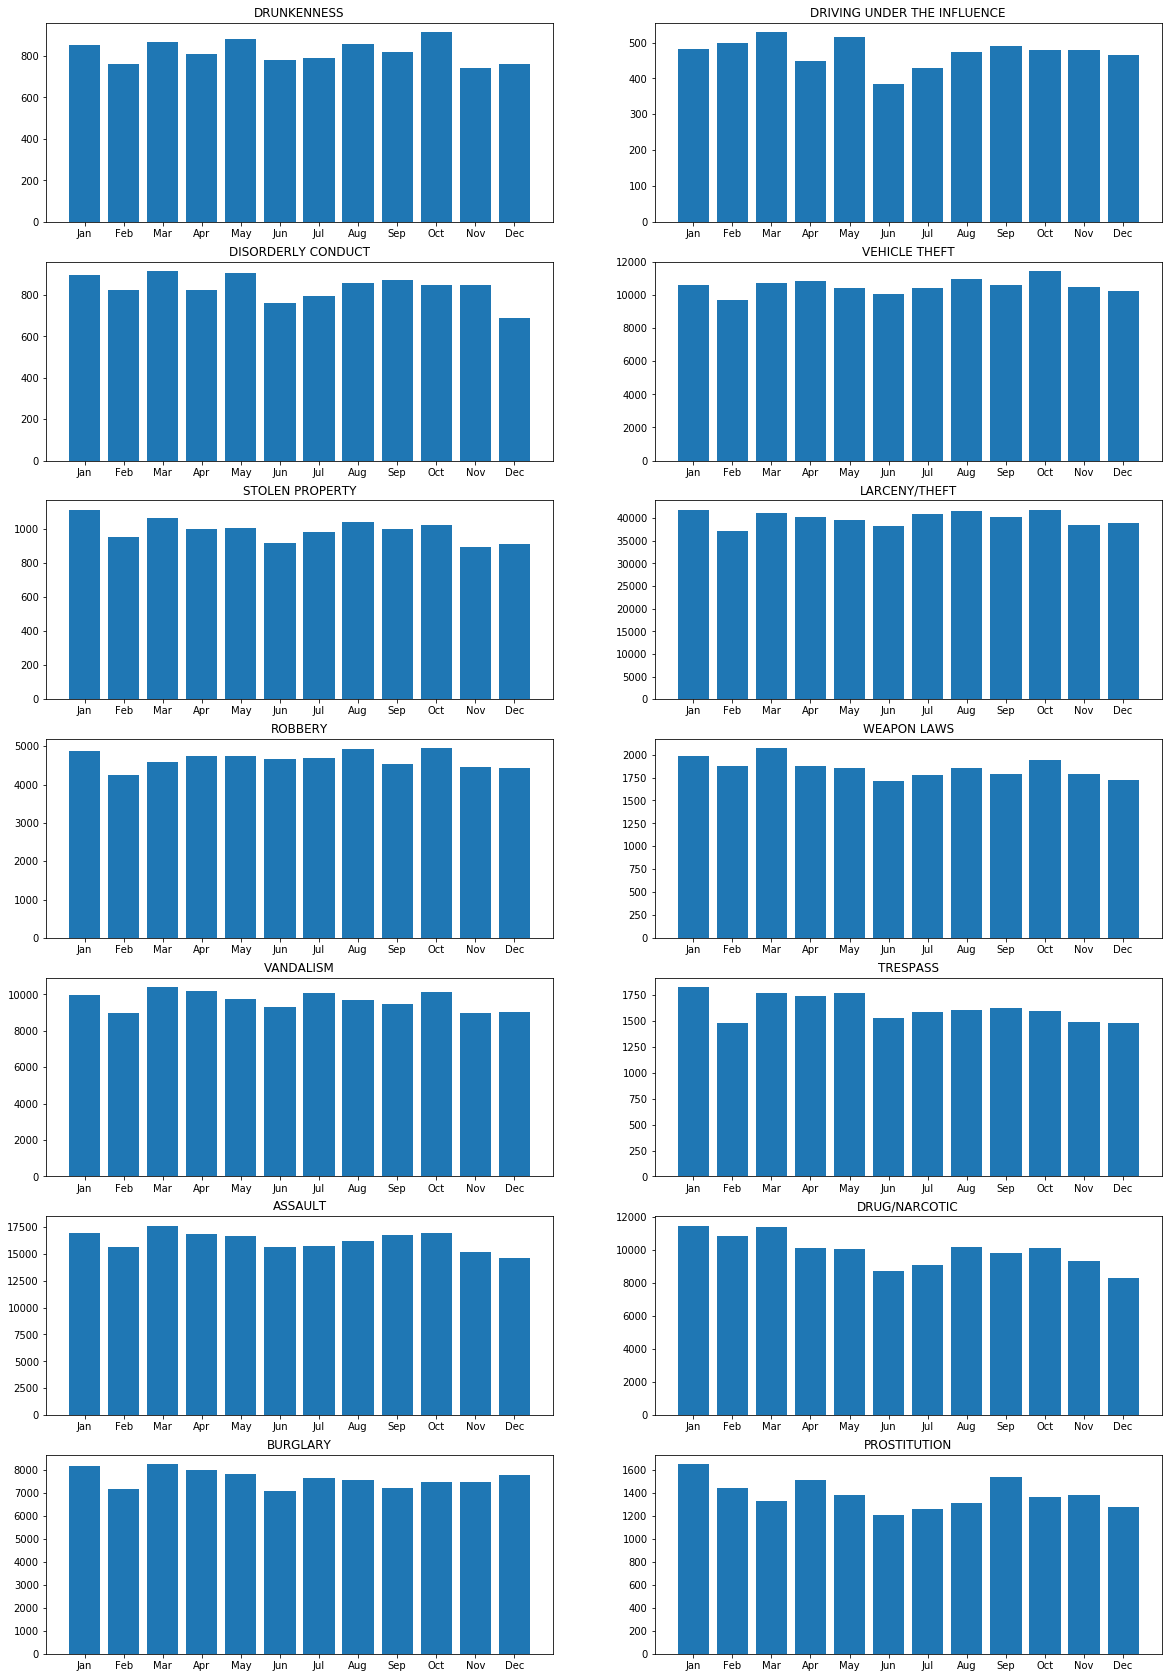

In [6]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(months)), xticklabels=months)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=pd.DatetimeIndex(crime_data[crime_data.Category==crime].Date).month.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1
plt.show()

The yearly patterns overall show that the number of reports pr. month does not varrie a lot. However there is a few interesting observations to be made. For instance June appear to be a month with few reports for all crimes types, compared to other months. This could indicate that there is less crime occuring in this month, or it could be indicating that less reports are made due to few police officers, since it is vecation season. For most crime types January appear to be a high crime month.

## The 24 hour cycle

In [7]:
from datetime import datetime

In [8]:
crime_data['Time']=pd.to_datetime(crime_data['Time'])

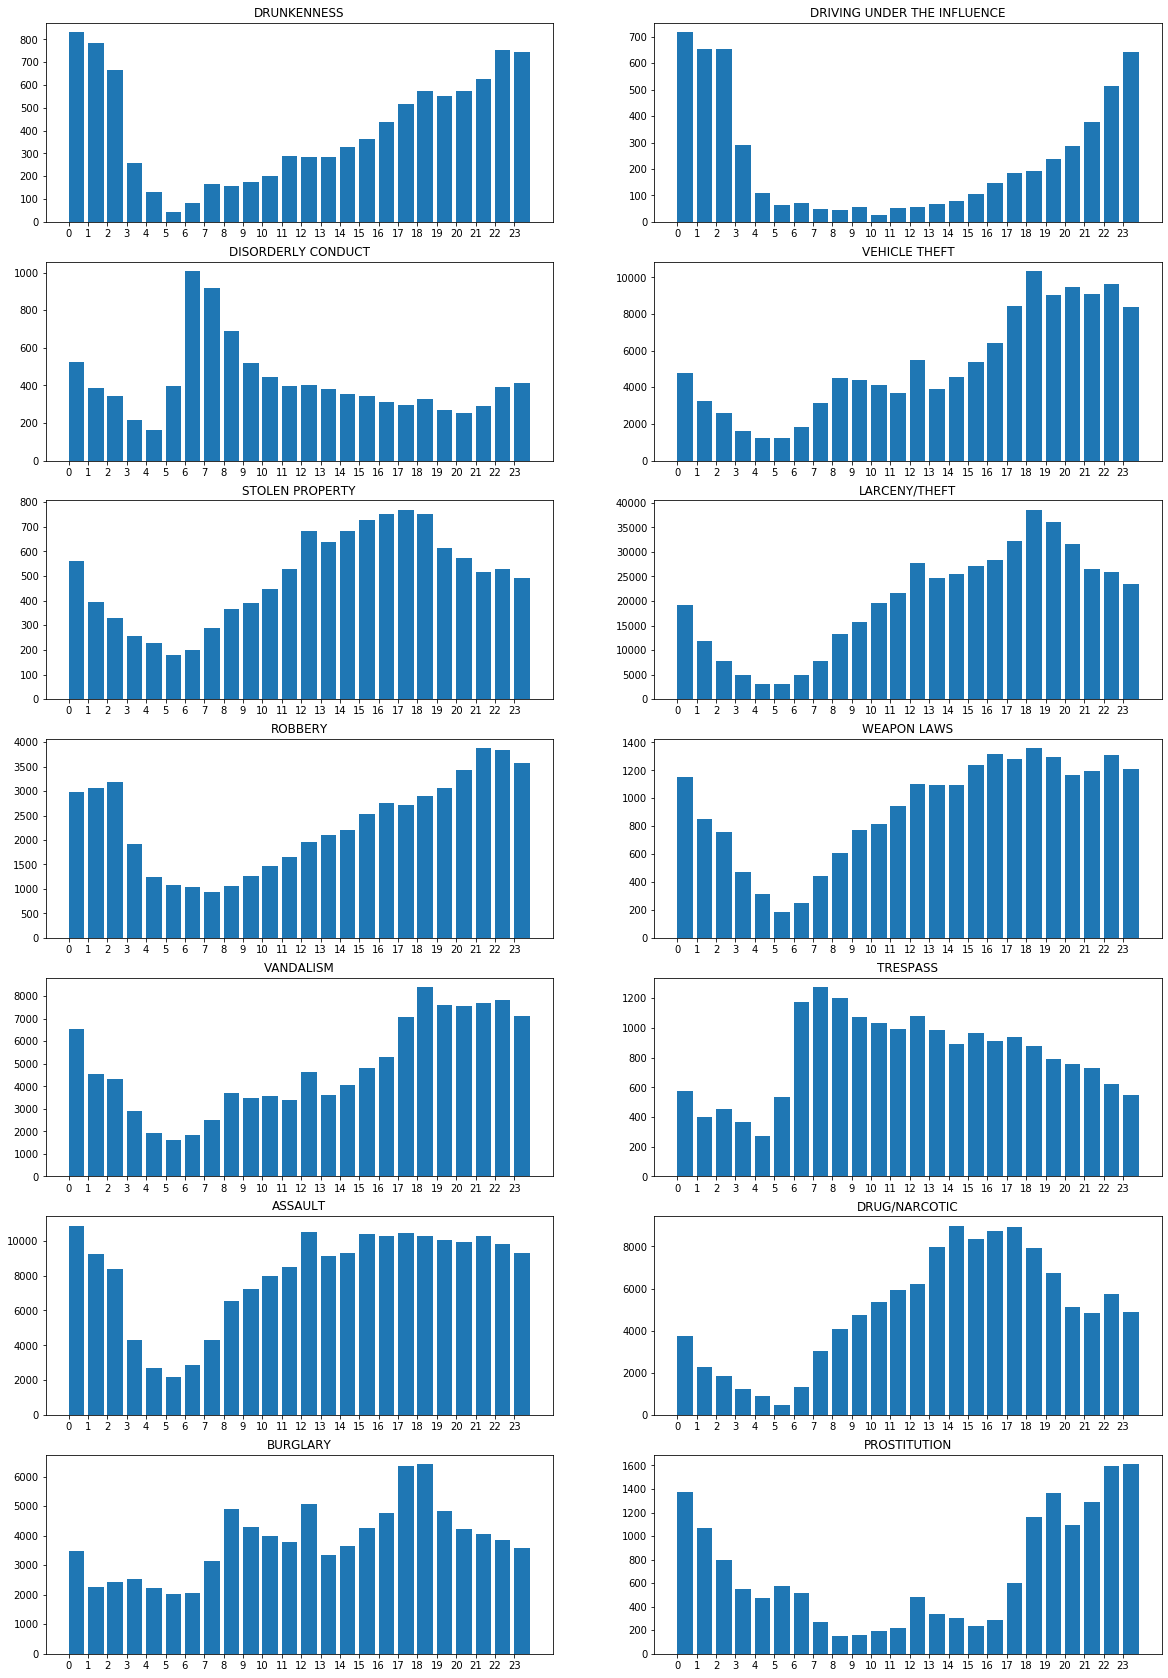

In [9]:
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(pd.DatetimeIndex(crime_data.Time).hour.value_counts())))
axs = axs.ravel()
i=0
for crime in focuscrimes :
    focus_crime_count=pd.DatetimeIndex(crime_data[crime_data.Category==crime].Time).hour.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist(),align='edge')
    axs[i].set_title(crime)
    i+=1
plt.show()

For prostitution it can be observed that from 0-7 the number of reports are decreasing and then stay low until 17 where it starts to increas again. However there is a very noticable break from this pattern from 12 to 13. A similar pattern where the number of reports are high during neight and low during morning and day hours can also be observed for **Driving under the influence**. **Weapon laws**, **Burglary** , **Robbery**, **Larcent/Theft**, **Assault** and **Drunkness** all have a steap decline in number of reports in the early morning hours around 5.
The pattern observed for **Disorderly conduct** stands out from the rest of the crimes. Here a very clear peak is observed at 6-7, and after a decline a smaller peak can be observed at 0-1.

## Hours of the week

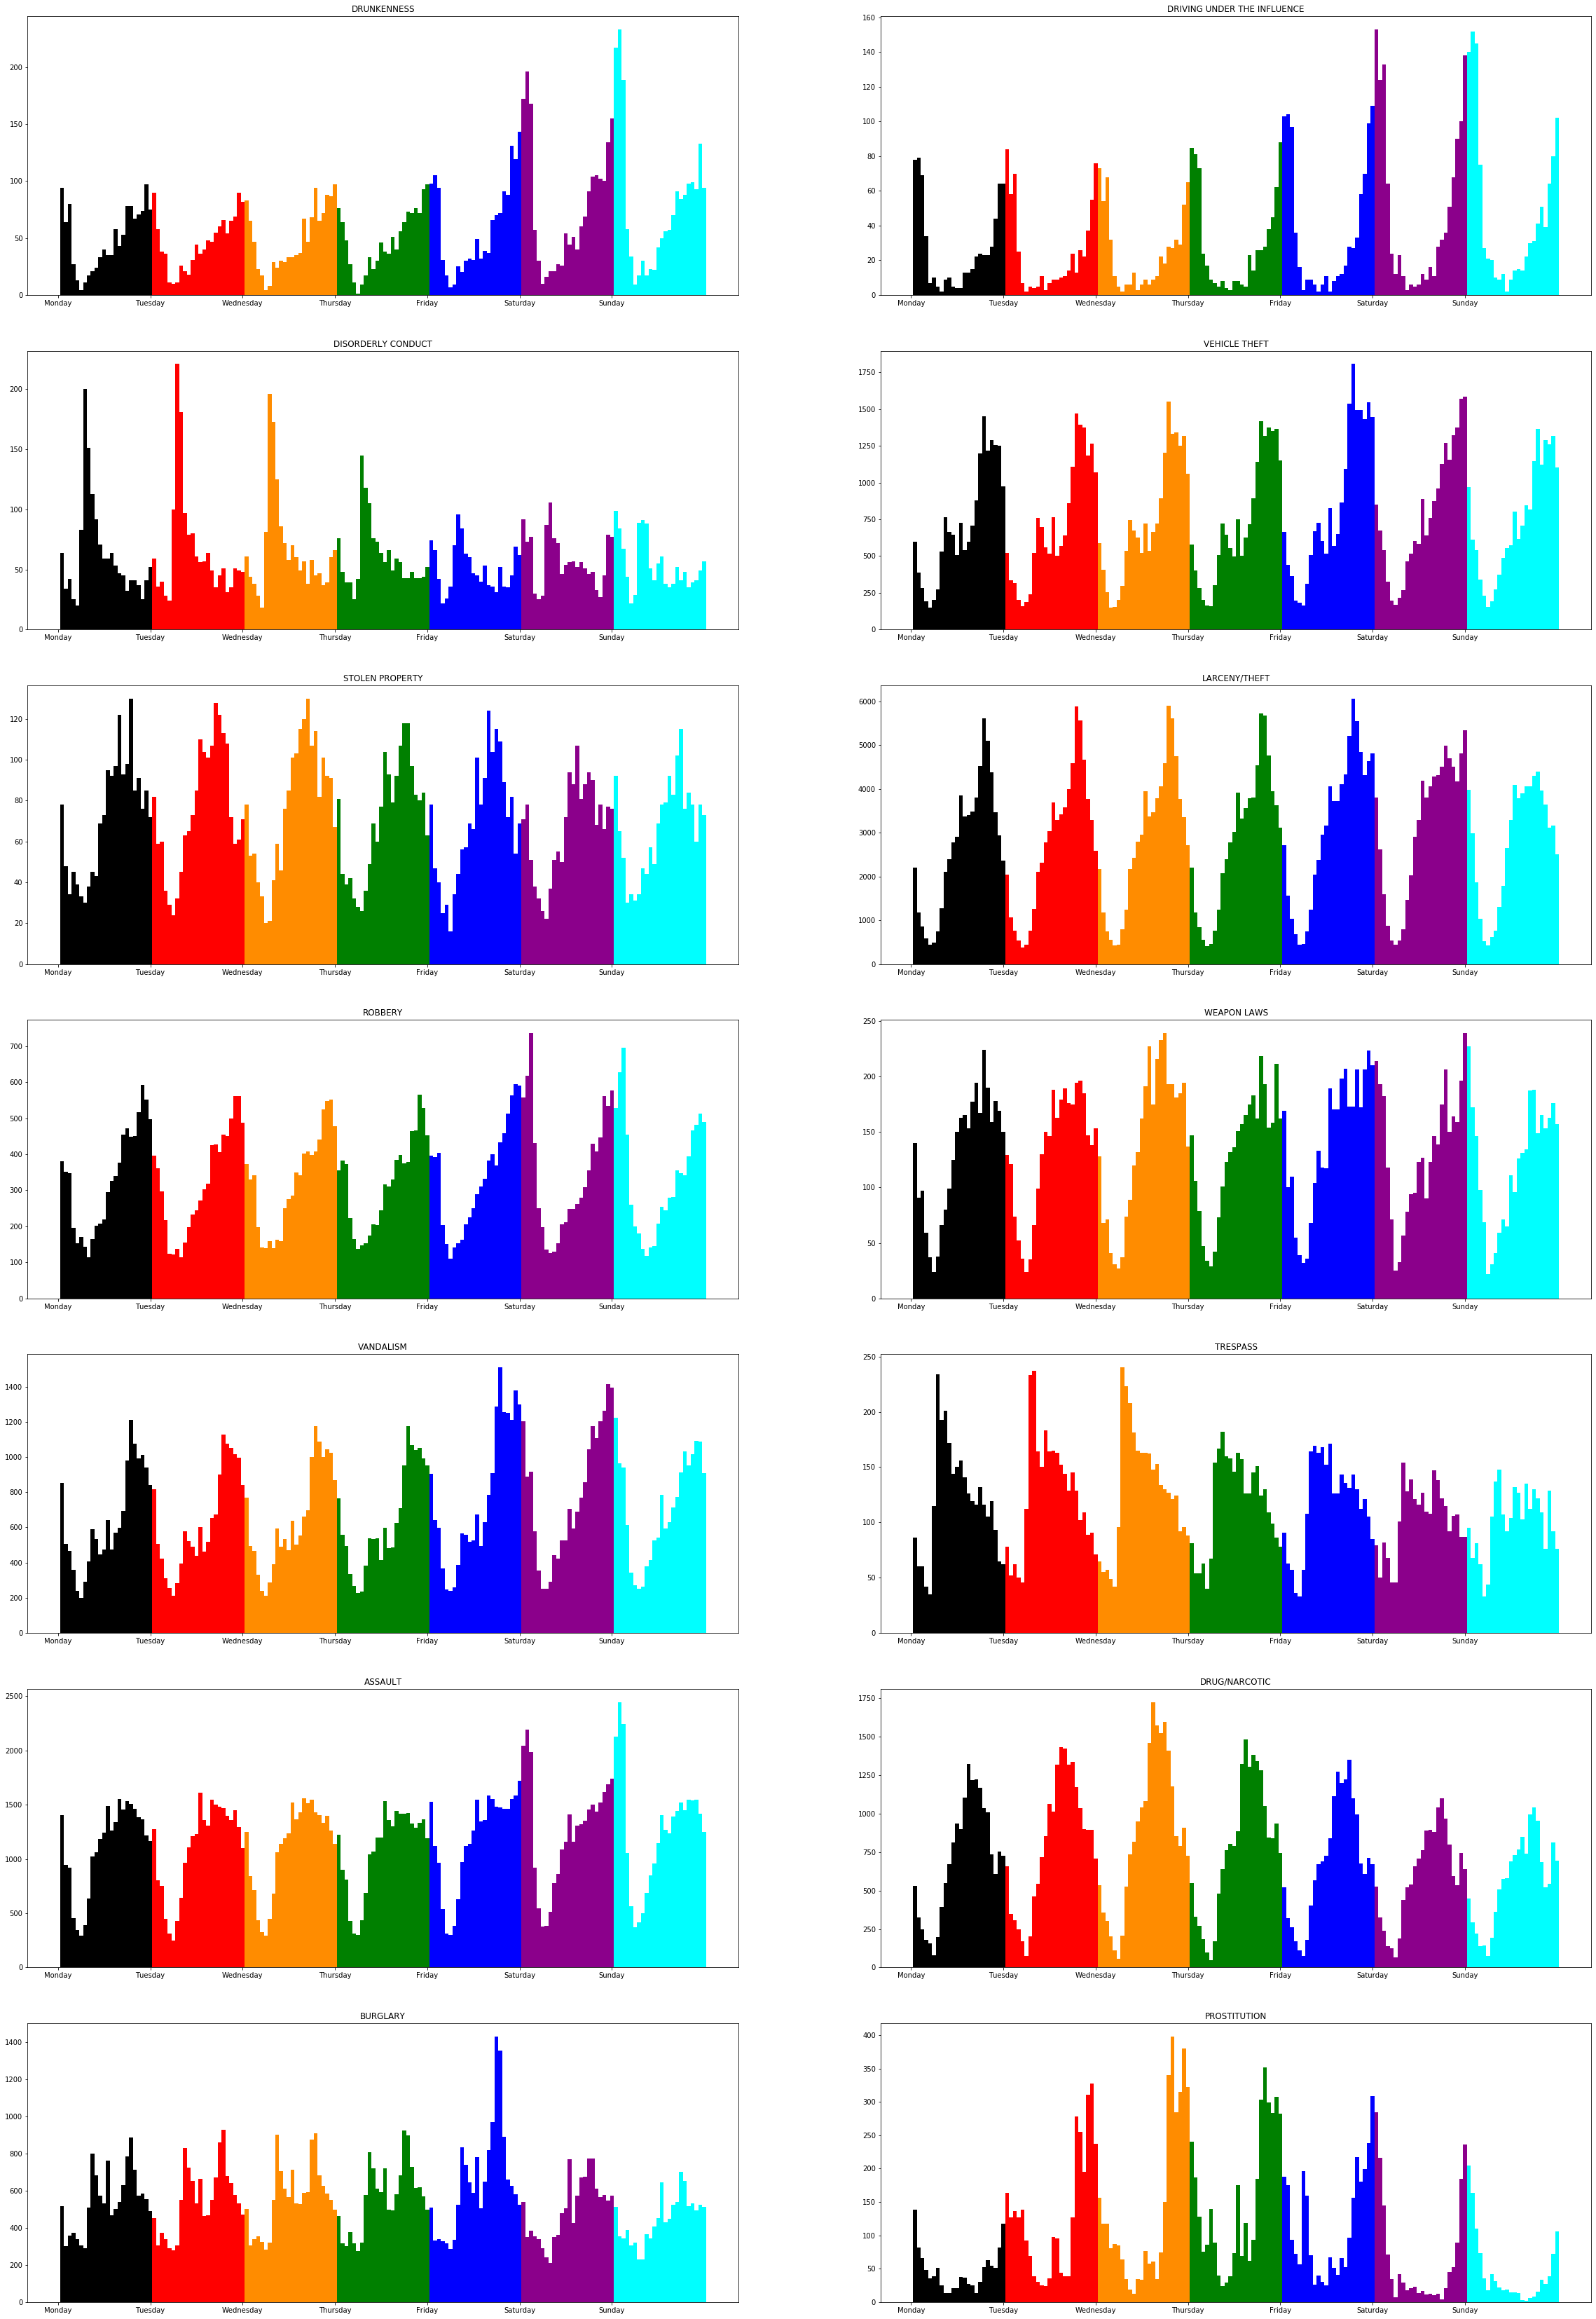

In [10]:
x = np.arange(len(days))
width = 1
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(40,60))
plt.setp(axs, xticklabels=days,xticks=x)

axs = axs.ravel()
i=0
for crime in focuscrimes :
    w=1
    for h in range(24):
        test=np.array(crime_data[(crime_data.Time.dt.hour==h) & (crime_data.Category==crime)].Day_id.value_counts().sort_index())
        axs[i].bar(x+w*(width/24), test,width/24, color=['black', 'red', 'darkorange','green', 'blue','darkmagenta', 'cyan'])
        w+=1
    axs[i].set_title(crime)
    i+=1
plt.show()

The above plots show a number of interesting cases in which the pattern over 24 hourse, stands out for certain days of the week. One such example is **Burglary**. Her it can be observed that esspecially Friday stand out from the rest of days, with a very large peak in the evening. Also for **Assult** the day of the week appear to be influencing the pattern of when reports are made. Here it is Saturday and Sunday that stands out with peaks around midnight. For **Trespass** there is a change in patterns for Sundays where the decline in number of reports there can normally be observed during the day is more flat. At last it can be observed that for **Prostitution** the midday pattern varries from weekdays and weekends.

# Part 2: Thinking about data and visualization#  Part 2

## Questions for the first video lecture

***What is the difference between data and metadata? How does that relate to the bike-example?***

While data describe certain recordings, meta data is information about the recordings them self. As in the case of the bike example there is data for heart rate, but there is also data describing where that data was recorded, this is an example of metadata.

***Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.***

We do agree that the human eye is a good data analysis tool, as it often allows us to grasp the data better than alot of statistics measures. Furthermore it allows for an efficient tool when observing patterns, that might be more complex to uncover using only statistical meassures. In addition to this the human eye can also be more robust as a tool in the sense that we often automaicly abstract from outliers, where certain statistical measures can be very sensitive to such data points. However one large downsite to the human eye as an analytics tool, is that it is not really effecinent before the data is visualized in some way. That mean that the human eye is very influenced by the initial method, with which the data is treated and visualised. If for instance the data is visualized using a histogram where the bin sizes have not been appropriately selected, it lead the eye to detect patterns, which in reality is not supported by the raw data itself.


***Simpson's paradox is hard to explain. Come up with your own example - or find one online.***

The follwoing example has been obtained thorugh https://blog.revolutionanalytics.com/2013/07/a-great-example-of-simpsons-paradox.html. 

The overall median wage in the US has been increasing. However for each educational subgroup the median wage has been decreassing. This is due to the fact that the distibution between the educational subgroups have changed, with more people obtainging college degrees.

***In your own words, explain the differnece between exploratory and explanatory data analysis.***

Exploratory data analysis is an approach to discover patterns and connections in a data set, where it from the begining is not clear what we are searching for. Explanatory analysis is about communication connections and patterns.

## Questions for the second video lecture

***As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?***

The pearson correlation works by measuring how strongly a change in one varible is associated with a change in another variable. With -1 and 1 being a very strong association, and 0 being no association. The correlation is calculated based on the following formula.

\begin{equation*}
r =\frac{n \sum(xy)-\sum(x)\sum(y)} {\sqrt{[n \sum(x^2)-\sum(x)^2] [n\sum(y^2)-(\sum(y)^2]}}
\end{equation*}
Refference: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/


The Pearson correlation does not work well in cases with outliers, where the resulting coefficient can give missleading results. However in a visualisation it is easy to spot the outliers and observe the overall linear correlation between the variables.

Refference: https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404


***What is the difference between a bar-chart and a histogram?***

In a bar chart there is a bar for each value, displaying the number of occurences of this value.
In a histogram the bars are not for one value each, but instead for bins of values, showing the number of occurences for values within the bin.

***I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.***

There is no perfect rule to determin the bin size, and most rules appear to work best for normally distributed data. However Sturge’s rule does appear to provide a simple starting point for determing the number of bins, and thereby the size of the bins. The formula is 

\begin{equation*}
1 + 3. 322 log(N)
\end{equation*}
Refference: https://www.statisticshowto.datasciencecentral.com/choose-bin-sizes-statistics/

However it is still neccessary to test out different bin-sizes, so it is adjusted to the specific data set.

# Part 3: Generating important plot types

### Jitter plot: arrest time for assults from June to September 2016, from 13-14.

In [11]:
crime_data['Time1'] = crime_data['Time']
df1 = crime_data[crime_data['Category']=='ASSAULT'].set_index('Time1').between_time('12:59:00','14:00:00')
df1['Date'] = pd.to_datetime(df1['Date'])

In [12]:
assault_data = df1[(df1["Date"].dt.month >=6) & (df1["Date"].dt.month <=9)&(df1["Date"].dt.year == 2016)]

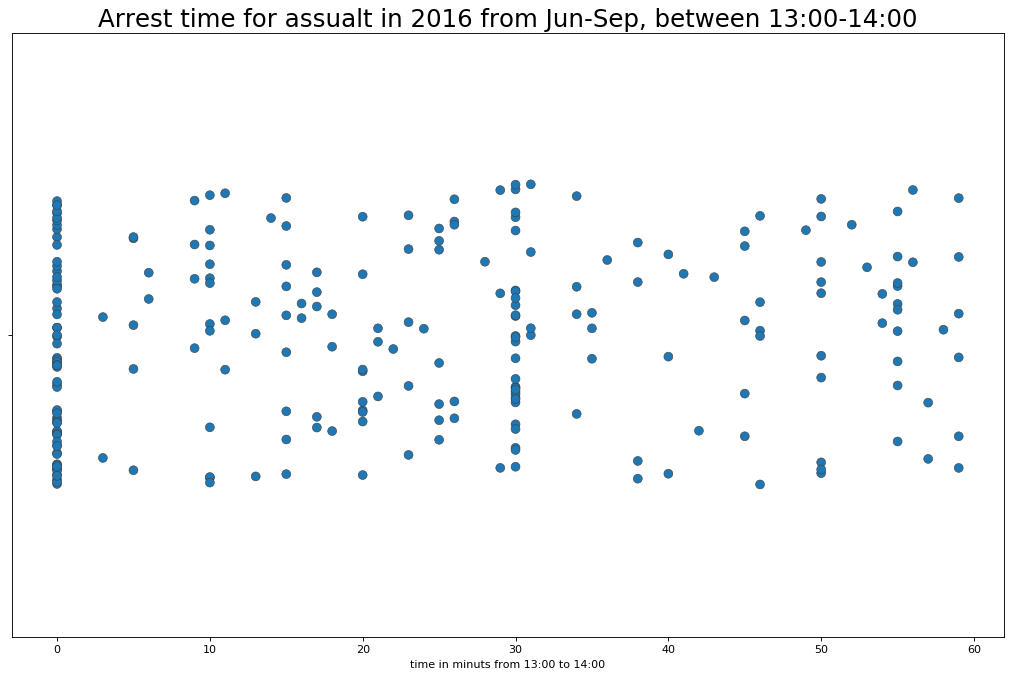

In [13]:
fig,ax = plt.subplots(figsize=(16,10),dpi = 80)

sns.stripplot(assault_data.Time.dt.minute,jitter = 0.25,size = 8,ax = ax,linewidth =.5)
plt.title('Arrest time for assualt in 2016 from Jun-Sep, between 13:00-14:00', fontsize=22)
plt.xlabel("time in minuts from 13:00 to 14:00")
plt.show()

The above plot shows that most crimes are recorded exactly at the clock, and at half pass. This does indicate that that time recordings are not made with great precision.

## Histogram

To take a look at the geographical pattern of the crimes, this is here illustrated by showing the distribution of the different crime types in the different districts.

In [14]:
datafocus=crime_data[crime_data['Category'].isin(focuscrimes)]

In [15]:
df2=datafocus.groupby(['Category','PdDistrict']).size().to_frame()

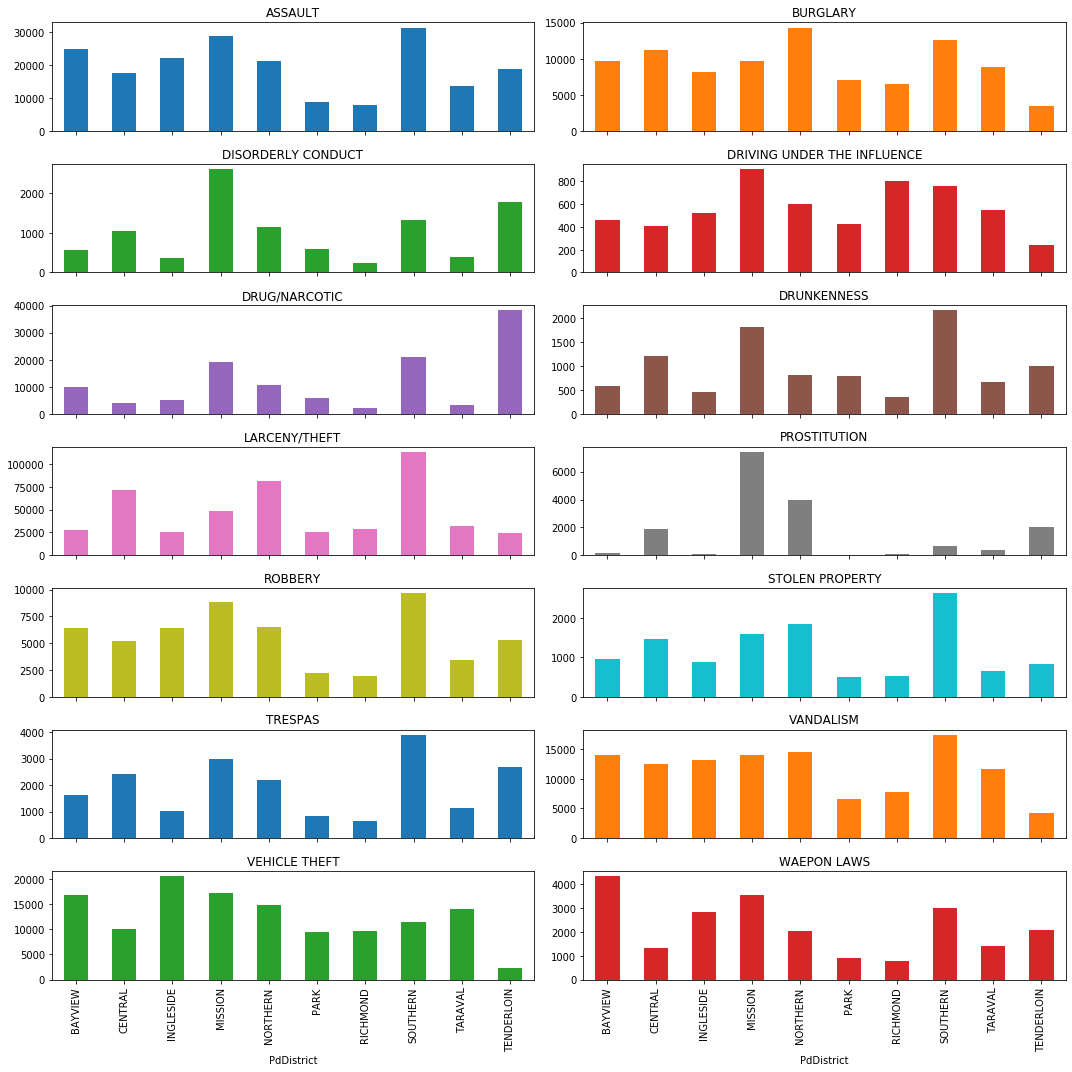

In [16]:
df2.unstack(level=0).plot(kind='bar',subplots=True,sharex=True,layout=(7,2),figsize=(15,15),title=["ASSAULT","BURGLARY","DISORDERLY CONDUCT", "DRIVING UNDER THE INFLUENCE","DRUG/NARCOTIC","DRUNKENNESS","LARCENY/THEFT","PROSTITUTION","ROBBERY","STOLEN PROPERTY","TRESPAS","VANDALISM","VEHICLE THEFT","WAEPON LAWS"],legend=False);
plt.tight_layout()
plt.show()

Based on the above polt "DRUG/NARCOTIC" and "PROSTITUTION" is selected, as they show different geographical patterns. In order to figure out which time period to focus on, we seperatily plot the distribution of these two crime types based on time.

In [17]:
df3=crime_data[(crime_data['Category']=='DRUG/NARCOTIC')| (crime_data['Category']=='PROSTITUTION')]

In [18]:
df3['hour']=df3['Time'].dt.hour

C:\Users\iontel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df3=df3.groupby(['Category','hour']).size().to_frame()

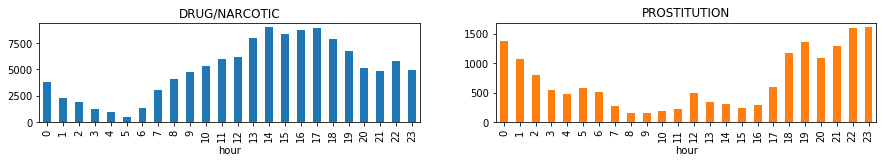

In [20]:
df3.unstack(level=0).plot(kind='bar',subplots=True,sharex=True,layout=(7,2),figsize=(15,15),title=["DRUG/NARCOTIC","PROSTITUTION"],legend=False);

Based on the above polts, 18:00-19:00 is chosen as the reserch period, as this fulfil the requirement of haveing between 1000-10000 observations.

Now the distribution of the two crimes is investigated accoding to their latitudes(the GPS locations).

In [21]:
df3=crime_data[(crime_data['Category']=='DRUG/NARCOTIC')| (crime_data['Category']=='PROSTITUTION')]

In [22]:
np.histogram(df3[df3['Category']=='DRUG/NARCOTIC']['Y'],50)

(array([119621,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      7], dtype=int64),
 array([37.7081536 , 38.75399053, 39.79982746, 40.84566438, 41.89150131,
        42.93733824, 43.98317517, 45.0290121 , 46.07484902, 47.12068595,
        48.16652288, 49.21235981, 50.25819674, 51.30403366, 52.34987059,
        53.39570752, 54.44154445, 55.48738138, 56.5332183 , 57.57905523,
        58.62489216, 59.67072909, 60.71656602, 61.76240294, 62.80823987,
        63.8540768 , 64.89991373, 65.94575066, 66.99158758, 68.03742451,
        69.08326144, 70.12909837, 71.1749353 , 72.22077222, 73.26660915,
        74.3124460

In [23]:
np.histogram(df3[df3['Category']=='PROSTITUTION']['Y'],50)

(array([16699,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     2], dtype=int64),
 array([37.7107673 , 38.75655195, 39.8023366 , 40.84812126, 41.89390591,
        42.93969057, 43.98547522, 45.03125987, 46.07704453, 47.12282918,
        48.16861384, 49.21439849, 50.26018314, 51.3059678 , 52.35175245,
        53.39753711, 54.44332176, 55.48910641, 56.53489107, 57.58067572,
        58.62646038, 59.67224503, 60.71802969, 61.76381434, 62.80959899,
        63.85538365, 64.9011683 , 65.94695296, 66.99273761, 68.03852226,
        69.08430692, 70.13009157, 71.17587623, 72.22166088, 73.26744553,
        74.31323019, 75.35901484, 76.4047995 , 77.45058415, 78.4963688 ,
   

After doing the np.histograms above, some errors are noticed. Most data is aggregated in the first bin, while other bins are empty except for the last bin which contain a few observations. However observations with latitudes near 90 are unreasonable, as this coresponds to a location near the North Pole. These data points are therefore excluded.

In [24]:
df4=df3[df3['Y']<80]

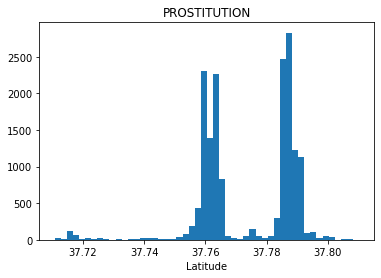

In [25]:
plt.hist(df4[df4['Category']=='PROSTITUTION']['Y'],50)
plt.title('PROSTITUTION')
plt.xlabel('Latitude')
plt.show()

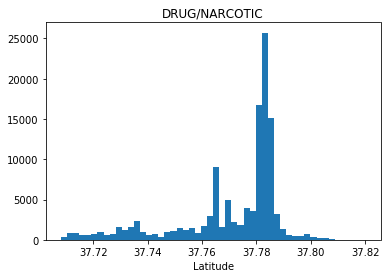

In [26]:
plt.hist(df4[df4['Category']=='DRUG/NARCOTIC']['Y'],50)
plt.title('DRUG/NARCOTIC')
plt.xlabel('Latitude')
plt.show()

Based on the above two plots, it can be observed that prostitution and drug activities are distributed differently through out the city. Prostitution appear to be focused around the latitudes 37.76 and 37.79, while drug activities appear to be concentrated around 37.85.

## Kernel density plot 

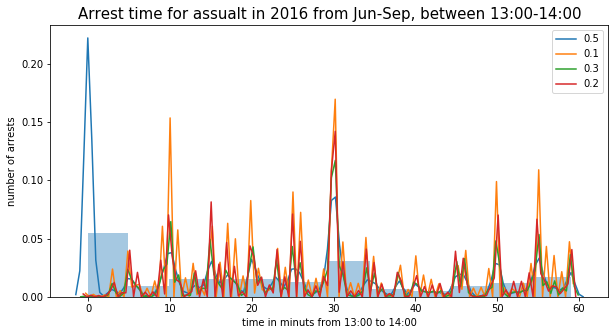

In [27]:
assult_min=np.array(assault_data.Time.dt.minute)
fig,ax =plt.subplots(figsize=(10,5))

ax=sns.distplot(assult_min,bins=12, kde_kws={"bw":0.5,"label":'0.5'})
sns.kdeplot(assult_min, bw=0.1, label='0.1')
sns.kdeplot(assult_min, bw=0.3, label="0.3")
sns.kdeplot(assult_min, bw=0.2, label="0.2")
plt.title('Arrest time for assualt in 2016 from Jun-Sep, between 13:00-14:00', fontsize=15)
plt.xlabel("time in minuts from 13:00 to 14:00")
plt.ylabel("number of arrests")
plt.show()

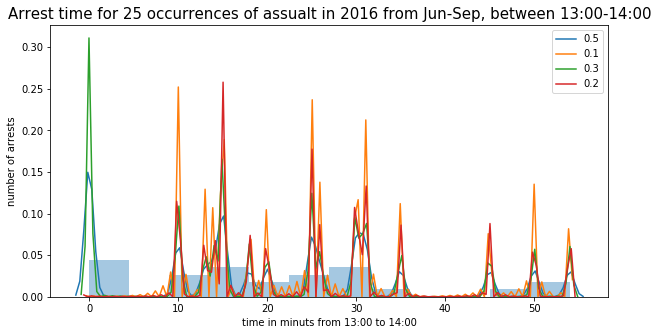

In [28]:
import random
random_times=random.choices(assult_min, k=25)
fig,ax =plt.subplots(figsize=(10,5))
ax=sns.distplot(random_times,bins=12, kde_kws={"bw":0.5,"label":'0.5'})
sns.kdeplot(random_times, bw=0.1, label='0.1')
sns.kdeplot(random_times, bw=0.3, label="0.3")
sns.kdeplot(random_times, bw=0.2, label="0.2")
plt.title('Arrest time for 25 occurrences of assualt in 2016 from Jun-Sep, between 13:00-14:00', fontsize=15)
plt.xlabel("time in minuts from 13:00 to 14:00")
plt.ylabel("number of arrests")
plt.show()

Based on the two above plots, it can be observed that the data points you have collected influence the overall observed pattern a lot. Furthermore it becomes clear that the kernal density plot does appear to contain more information than what is provided by the available data. This is highlighted in the last plot, where there is no data available in certain bins, but the kernal density function is still showing an estimate in these intervals.

# Part 4: Heatmaps of geo-data

In [29]:
import folium

## Map of San Francisco with marker for SF City Hall

In [30]:
lat = 37.773972
lon = -122.431297
t_list = ["San Francisco", "SF City Hall"]
San = folium.Map([lat, lon],t_list = "San Francisco", tiles='cartodbpositron',zoom_start=13)

In [31]:
folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(San)
San

## Point scatter plot for arrests made for Drug/narcotic in  June-July of 2016

In [32]:
df3 = crime_data[crime_data['Category']=='DRUG/NARCOTIC']
#df3['Date'] = crime_data1.Date +" " + crime_data1.Time
#df3['Date1'] = pd.to_datetime(df3['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

C:\Users\iontel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
#df4=df3[(df3["Date1"].dt.month == 6) &(df3["Date1"].dt.year == 2016)]
df4=df3[((df3["Date"].dt.month == 6)|(df3["Date"].dt.month == 7))&(df3["Date"].dt.year == 2016)]

In [34]:
for i in range (int(len(df4.X))):
    folium.Marker([df4.Y.iloc[i], df4.X.iloc[i]],icon=folium.Icon(color='red')).add_to(San)
    
San

## Heat Maps

### Heatmap for all arrests for the category 'SEX OFFENSES, NON FORCIBLE'

In [35]:
from folium import plugins
from folium.plugins import HeatMap

In [36]:
#df5 = crime_data1[crime_data1['Category']=='SEX OFFENSES, NON FORCIBLE']
#df5['Date'] = crime_data1.Date +" "+ crime_data1.Time
#df5['Date1'] = pd.to_datetime(df5['Date'])


#df5 = df5[['Y', 'X']]
#heat_df = heat_df[[df5.Y,df5.X]]
#df5 = df5.dropna(axis=0, subset=['Y','X'])
# List comprehension to make out list of lists
#heat_data = [[row['Y'],row['X']] for index, row in df5.iterrows()]
#HeatMap(heat_data).add_to(San1)
#San1

San1 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)

df5 = crime_data[crime_data['Category']=='SEX OFFENSES, NON FORCIBLE']
#df5['Date'] = crime_data.Date +" "+ crime_data1.Time
df5['Date'] = pd.to_datetime(df5['Date'])


df5 = df5[['Y', 'X']]
#heat_df = heat_df[[df5.Y,df5.X]]
df5 = df5.dropna(axis=0, subset=['Y','X'])
# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in df5.iterrows()]
HeatMap(heat_data).add_to(San1)
San1

C:\Users\iontel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### The differences between scatter plots and heatmaps

The scatter plots allow for each individual data point to be observed. This means that  more statistical analysis which need physical measurement can be applied, such as the distance between two crime case or summing up all crime cases on a particular street. Overall, the scatter plots focus more on the details than the heatmaps.<br>
The heatmap on the other hand highlight overall patterns better, with clusters of poitns being more easily viewed. This makes it easier to distinguish between areas where crimes happens often and areas where crimes does not happen very often. 

### Parameters of heatmaps

First *FloatImage* is used to add an image on top of the map, while *BeautifyIcon* is used to create a new icon to mark the city hall.

In [43]:
San2 = folium.Map([lat, lon],t_list = "San Francisco" , tiles='cartodbpositron',zoom_start=13)
folium.plugins.BeautifyIcon(icon='plane',icon_shape='rectangle-dot', border_color='#b3334f', text_color='#b3334f').add_to(folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(San2))
folium.plugins.FloatImage('smallpig.jpg', bottom=75, left=75).add_to(San2)
San2

Secondly *DualMap* is used to display two maps of the area around Lyngby, where the placement of DTU only is highlighted on one.

In [38]:
mapplay =folium.plugins.DualMap(location=(55.79, 12.50378), tiles='cartodbpositron', zoom_start=12)
folium.Marker([55.7815, 12.5180], popup='DTU').add_to(mapplay.m1)
mapplay

### Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom).

#### Radius

In [39]:
San1

In [40]:
San3 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)
HeatMap(heat_data,radius=20).add_to(San3)
San3

The radius describe the radius of the radiation from each data point. Visually this mean that the heat map will have fewer high heat areas, as most data points have a bit distance between each other. In the above plot the radius have been lower to 20, compared to 25 which is the default value used in the map San1. By lowering the radius, it can be observe that most ***SEX OFFENSES, NON FORCIBLE*** is reported in a building on the 800 block of Bryant stree. This is the same as what is highlighed in the given example.

#### Max_zoom

In the below map *max_zoom* has been decreased to 1, from the default value of 18. This means that already at zoom 1, each observation is shown with max intensity. The effect is that even when the observations are seen from afar they are displayed with red. The result is that it is no longer possible to distinguish between areas with high and low criminal activiy.

In [41]:
San4 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)
HeatMap(heat_data,max_zoom=1).add_to(San4)
San4

### What's going on in the building on the 800 block of Bryant street.

At a first glance it appear that the building is center for sexual offences in San Francisco. However under further investigation of the loaction, it is discovered that the building contains the hall of justice. Since the building contains the citys police headquarter, it is assumed that a lot of suspects will be brought here before an official report is made. Furthermore it is also to be assumed that a lot of victims will report the crimes here. All in all this leads to the conclusion that the building is in fact not a criminal hot-spot, and the high heat shown at the location instead is a result of the nature of the police work.

Reference: https://www.yelp.com/biz/hall-of-justice-san-francisco 

## Heat map movie

In [42]:
df6 = crime_data[crime_data['Category']=='DRIVING UNDER THE INFLUENCE']
#df6['Date'] = crime_data2.Date +" "+ crime_data2.Time
#df6['Date1'] = pd.to_datetime(df6['Date'])
df6['Date1'] = pd.to_datetime(df6['Date'])

df6=df6[(df6.DayOfWeek =='Friday')|(df6.DayOfWeek =='Saturday')|(df6.DayOfWeek =='Sunday') ]
df7 = df6[(df6.DayOfWeek =='Friday')]
df8 = df6[(df6.DayOfWeek =='Saturday')]
df9 = df6[(df6.DayOfWeek =='Sunday')]
print(df7)
print(df8)
print(df9)
#&(df6.DayOfWeek =='Thursday')&(df6.DayOfWeek =='Saturday')&(df6.DayOfWeek =='Sunday')]
#df6

"""df6['Weight'] = df6.Date1.dt.hour+df6.Date1.dt.minute/60
df6 = df6[['Y', 'X','Weight']]
df6['Weight'] = df6['Weight'].astype(float)
df6 = df6.dropna(axis=0, subset=['Y','X','Weight'])"""
# weight for Friday
df7['Weight'] = df7.Time.dt.hour+df7.Time.dt.minute/60
df7 = df7[['Y', 'X','Weight']]
df7['Weight'] = df7['Weight'].astype(float)
df7 = df7.dropna(axis=0, subset=['Y','X','Weight'])

df8['Weight'] = df8.Time.dt.hour+df8.Time.dt.minute/60
df8 = df8[['Y', 'X','Weight']]
df8['Weight'] = df8['Weight'].astype(float)
df8 = df8.dropna(axis=0, subset=['Y','X','Weight'])

df9['Weight'] = df9.Time.dt.hour+df9.Time.dt.minute/60
df9 = df9[['Y', 'X','Weight']]
df9['Weight'] = df9['Weight'].astype(float)
df9 = df9.dropna(axis=0, subset=['Y','X','Weight'])

# Create weight column, using Date.time


# List comprehension to make out list of lists
heat_data1 = [[[row['Y'],row['X']] for index, row in df7[df7['Weight'] == i].iterrows()] for i in range(0,24)]
heat_data2 = [[[row['Y'],row['X']] for index, row in df8[df8['Weight'] == i].iterrows()] for i in range(0,24)]
heat_data3 = [[[row['Y'],row['X']] for index, row in df9[df9['Weight'] == i].iterrows()] for i in range(0,24)]

# Plot it on the map
San5 = folium.Map([lat, lon],t_list = "San Francisco" ,zoom_start=13)
hm1 = plugins.HeatMapWithTime(heat_data1,auto_play=True,radius=50,max_opacity=0.8)
hm2 = plugins.HeatMapWithTime(heat_data2,gradient = 0.4 ,auto_play=True,radius=50,max_opacity=0.8)
hm3 = plugins.HeatMapWithTime(heat_data3,gradient = 0.65 ,auto_play = True,radius=50,max_opacity=0.8)
hm1.add_to(San5)
hm2.add_to(San5)
hm3.add_to(San5)
San5

         IncidntNum                     Category  \
2015      150115864  DRIVING UNDER THE INFLUENCE   
2180      150113545  DRIVING UNDER THE INFLUENCE   
4179      150136202  DRIVING UNDER THE INFLUENCE   
4191      150135840  DRIVING UNDER THE INFLUENCE   
6106      150158795  DRIVING UNDER THE INFLUENCE   
...             ...                          ...   
2203717   170695119  DRIVING UNDER THE INFLUENCE   
2206770   170472923  DRIVING UNDER THE INFLUENCE   
2210323   170533995  DRIVING UNDER THE INFLUENCE   
2210667   171034445  DRIVING UNDER THE INFLUENCE   
2213326   170392086  DRIVING UNDER THE INFLUENCE   

                                                  Descript DayOfWeek  \
2015          DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL    Friday   
2180            DRIVING WHILE UNDER THE INFLUENCE OF DRUGS    Friday   
4179          DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL    Friday   
4191            DRIVING WHILE UNDER THE INFLUENCE OF DRUGS    Friday   
6106          D

C:\Users\iontel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\iontel\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\iontel\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Our heatmap is mapped with 24hours scalled from Friday to Sunday within crime type 'DRIVING UNDER THE INFLUENCE'.


It reveals that on the night period(23:00 to 6:00),the frequency of cime is higher than other time, which make sense as more people drink alcohol during this period. This crime type and time period is choosen as it should be easier observe the difference in pattern over time.

# Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

For the three examples, describe in your own words how the data-errors can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

***In the hourly activity for PROSTITUTION something surprising is going on on Thursday:*** This potential error may lead data users to think about whether there is a special relationship between "prostitution "and "Thursday" which may require extra data and information. For the binned data, this error may break the systematical pattern for the whole dataset. If this error is not noticed fo this model. the data user may conclude that there isn't a clear trend for this type of crime when in fact it has.
On the other hand, maybe there are more crimes these days, but they are not supposed to be that extremely high because as the bin plot shows, it goes suddenly too low after the highest point.


***More crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers:*** This does create a bias when the data is binned to illustrate the hourly crime activety. This is due to the fact that reports is moved from one bin to the next, when the time is rounded to the next hour. If this error is not noticed, it can lead to the conclusion that the highest rate of crime on the hour. However the precision of the records does not allow for such conclusions.

***The Hall of Justice seemed to be an unlikely hotspot for sex offences:*** Since the hall of justice is the headquarter of the police, it is to be expected that a lot of reports will be filled there, for crimes that did not occure there. However if there is not an awareness of this special case, and the location is allways treated as the location at which the crime occure, it will as lead to the conclusion that there is a seriouse problem within the police department.